# Finite Difference Method based Wave Simulation in 2D Homogeneous medium  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

import matplotlib
matplotlib.use("nbagg")
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
# paramters
nx=500
dx=1
nz=nx
dz=dx
nt=1000
dt=0.001

#source location
isrcx=150*dx     #in metres
isrcz=100*dz   

c0=400

In [3]:
# CFL stability criteria
eps  = c0 * dt / dx
eps

0.4

# gridspec

class matplotlib.gridspec.GridSpec(nrows, ncols, figure=None, left=None,  bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)	
    
nrows : int
Number of rows in grid.

ncols : int
Number or columns in grid.

figure : Figure, optional
left, right, top, bottom : float, optional
Extent of the subplots as a fraction of figure width or height. Left cannot be larger than right, and bottom cannot be larger than top.

wspace : float, optional
The amount of width reserved for space between subplots, expressed as a fraction of the average axis width.

hspace : float, optional
The amount of height reserved for space between subplots, expressed as a fraction of the average axis height.

width_ratios : length ncols iterable, optional
Width ratios of the columns.

height_ratios : length nrows iterable, optional
Height ratios of the rows.

# Fast Fourier Transform


## numpy.fft.fft


Compute the one-dimensional discrete Fourier Transform.

This function computes the one-dimensional n-point discrete Fourier Transform (DFT) with the efficient Fast Fourier Transform (FFT) algorithm. 

Parameters:	
a : array_like
Input array, can be complex.

n : int, optional
Length of the transformed axis of the output. If n is smaller than the length of the input, the input is cropped. If it is larger, the input is padded with zeros. If n is not given, the length of the input along the axis specified by axis is used.

axis : int, optional
Axis over which to compute the FFT. If not given, the last axis is used.

norm : {None, “ortho”}, optional
New in version 1.10.0.

Normalization mode (see numpy.fft). Default is None.

Returns:	
out : complex ndarray
The truncated or zero-padded input, transformed along the axis indicated by axis, or the last one if axis is not specified.

Raises:	
IndexError
if axes is larger than the last axis of a.



## numpy.fft.fftfreq


Return the Discrete Fourier Transform sample frequencies.

The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with zero at the start). For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length n and a sample spacing d:

f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd
Parameters:	
n : int
Window length.

d : scalar, optional
Sample spacing (inverse of the sampling rate). Defaults to 1.

Returns:	
f : ndarray
Array of length n containing the sample frequencies.

<IPython.core.display.Javascript object>


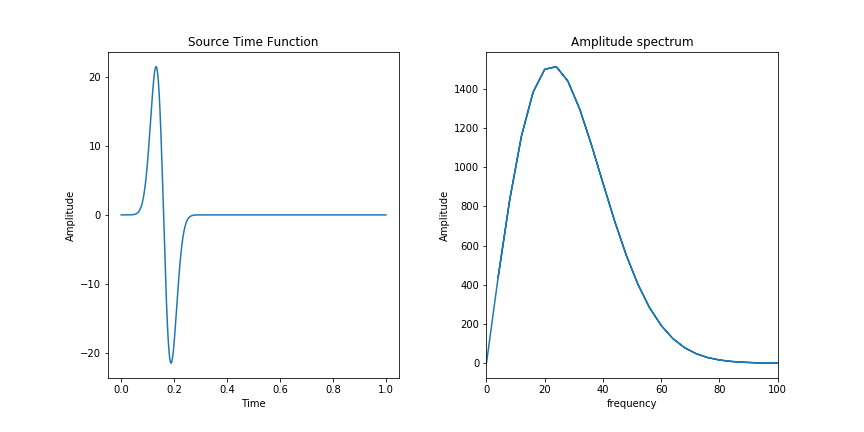

Text(0, 0.5, 'Amplitude')

In [4]:
# defining source wavelet
f0=25.0
t0=4.0/f0
src=np.zeros(nt+1)
time=np.linspace(0,nt*dt,nt)
src=-2. * (time - t0) * (f0 ** 2) * (np.exp(-1.0 * (f0 ** 2) * (time - t0) ** 2))
plt.ion()
fig1=plt.figure(figsize=[12,6])
gsp1=gridspec.GridSpec(1,2,width_ratios=[1,1], hspace=0.3, wspace=0.3)

ax1=plt.subplot(gsp1[0])
ax1.plot(time,src)
ax1.set_title("Source Time Function")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")

spectrum=np.fft.fft(src)
frequency=np.fft.fftfreq(spectrum.size,d=dt/4.0)


ax2=plt.subplot(gsp1[1])
ax2.plot(np.abs(frequency),np.abs(spectrum))
ax2.set_xlim(0,100)
ax2.set_title("Amplitude spectrum")
ax2.set_xlabel("frequency")
ax2.set_ylabel("Amplitude")



# imshow

## matplotlib.pyplot.imshow

Display data as an image; i.e. on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image. Note: For actually displaying a grayscale image set up the color mapping using the parameters cmap='gray', vmin=0, vmax=255.

## Parameters:	
Xarray-like or PIL image
The image data. Supported array shapes are:

(M, N): an image with scalar data. The values are mapped to colors using normalization and a colormap. See parameters norm, cmap, vmin, vmax.
(M, N, 3): an image with RGB values (0-1 float or 0-255 int).
(M, N, 4): an image with RGBA values (0-1 float or 0-255 int), i.e. including transparency.
The first two dimensions (M, N) define the rows and columns of the image.

Out-of-range RGB(A) values are clipped.

cmapstr or Colormap, optional
The Colormap instance or registered colormap name used to map scalar data to colors. This parameter is ignored for RGB(A) data. Defaults to rcParams["image.cmap"] (default: 'viridis').

### normNormalize, optional
The Normalize instance used to scale scalar data to the [0, 1] range before mapping to colors using cmap. By default, a linear scaling mapping the lowest value to 0 and the highest to 1 is used. This parameter is ignored for RGB(A) data.

### aspect{'equal', 'auto'} or float, optional
Controls the aspect ratio of the axes. The aspect is of particular relevance for images since it may distort the image, i.e. pixel will not be square.

This parameter is a shortcut for explicitly calling Axes.set_aspect. See there for further details.

'equal': Ensures an aspect ratio of 1. Pixels will be square (unless pixel sizes are explicitly made non-square in data coordinates using extent).
'auto': The axes is kept fixed and the aspect is adjusted so that the data fit in the axes. In general, this will result in non-square pixels.
If not given, use rcParams["image.aspect"] (default: 'equal').

### interpolationstr, optional
The interpolation method used. If None, rcParams["image.interpolation"] (default: 'antialiased') is used.

Supported values are 'none', 'antialiased', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'.

If interpolation is 'none', then no interpolation is performed on the Agg, ps, pdf and svg backends. Other backends will fall back to 'nearest'. Note that most SVG renders perform interpolation at rendering and that the default interpolation method they implement may differ.

If interpolation is the default 'antialiased', then 'nearest' interpolation is used if the image is upsampled by more than a factor of three (i.e. the number of display pixels is at least three times the size of the data array). If the upsampling rate is smaller than 3, or the image is downsampled, then 'hanning' interpolation is used to act as an anti-aliasing filter, unless the image happens to be upsampled by exactly a factor of two or one.


### alphascalar or array-like, optional
The alpha blending value, between 0 (transparent) and 1 (opaque). If alpha is an array, the alpha blending values are applied pixel by pixel, and alpha must have the same shape as X.

### vmin, vmaxscalar, optional
When using scalar data and no explicit norm, vmin and vmax define the data range that the colormap covers. By default, the colormap covers the complete value range of the supplied data. vmin, vmax are ignored if the norm parameter is used.

### origin{'upper', 'lower'}, optional
Place the [0, 0] index of the array in the upper left or lower left corner of the axes. The convention 'upper' is typically used for matrices and images. If not given, rcParams["image.origin"] (default: 'upper') is used, defaulting to 'upper'.

Note that the vertical axes points upward for 'lower' but downward for 'upper'.


### extentscalars (left, right, bottom, top), optional
The bounding box in data coordinates that the image will fill. The image is stretched individually along x and y to fill the box.

The default extent is determined by the following conditions. Pixels have unit size in data coordinates. Their centers are on integer coordinates, and their center coordinates range from 0 to columns-1 horizontally and from 0 to rows-1 vertically.

Note that the direction of the vertical axis and thus the default values for top and bottom depend on origin:

For origin == 'upper' the default is (-0.5, numcols-0.5, numrows-0.5, -0.5).
For origin == 'lower' the default is (-0.5, numcols-0.5, -0.5, numrows-0.5).
See the origin and extent in imshow tutorial for examples and a more detailed description.

### filternormbool, optional, default: True
A parameter for the antigrain image resize filter (see the antigrain documentation). If filternorm is set, the filter normalizes integer values and corrects the rounding errors. It doesn't do anything with the source floating point values, it corrects only integers according to the rule of 1.0 which means that any sum of pixel weights must be equal to 1.0. So, the filter function must produce a graph of the proper shape.

filterradfloat > 0, optional, default: 4.0
The filter radius for filters that have a radius parameter, i.e. when interpolation is one of: 'sinc', 'lanczos' or 'blackman'.

### resamplebool, optional
When True, use a full resampling method. When False, only resample when the output image is larger than the input image.

### urlstr, optional
Set the url of the created AxesImage. See Artist.set_url.

##Returns:	
imageAxesImage

<IPython.core.display.Javascript object>


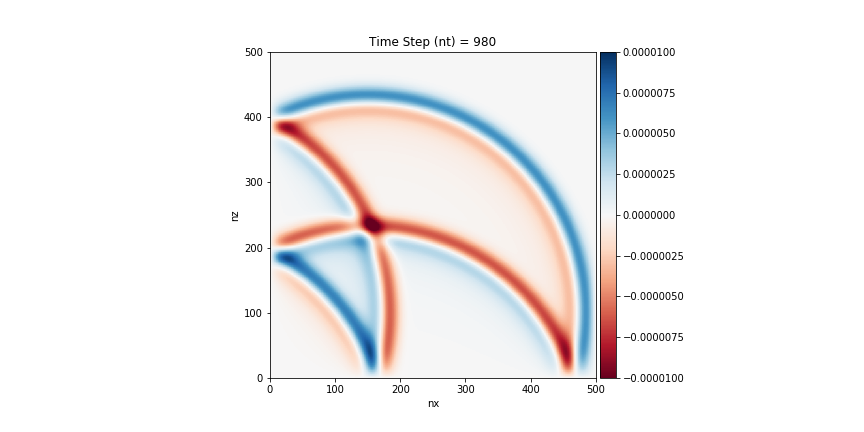

Text(0, 0.5, 'nz')

In [5]:
p=np.zeros((nz,nx))
pold=np.zeros((nz,nx))
pnew=np.zeros((nz,nx))
d2pz = np.zeros((nz, nx))
d2px = np.zeros((nz, nx))

c    = np.zeros((nz, nx))
c    = c + c0




lim=src.max()

plt.ion()

fig2=plt.figure(figsize=[12,6])
gsp2=gridspec.GridSpec(1,1)
ax3=plt.subplot(gsp2[0])
im1=ax3.imshow(p, vmin=-0.00001, vmax=+0.00001,interpolation="nearest", cmap=plt.cm.RdBu)

div  = make_axes_locatable(ax3)
cax  = div.append_axes("right", size="5%", pad=0.05) # size & position of colorbar
fig2.colorbar(im1, cax=cax) # plot colorbar

ax3.set_title('Time Step (nt) = 0')
ax3.set_xlim(0, nx)
ax3.set_ylim(0, nz)
ax3.set_xlabel('nx')
ax3.set_ylabel('nz')




In [6]:
for it in range(nt):
    for i in range(1,nx-1):
        d2px[i,:]=(p[i+1,:]-2*p[i,:]+p[i-1,:])/dx**2
    for j in range(1,nz-1):
        d2pz[:,j]=(p[:,j+1]-2*p[:,j]+p[:,j-1])/dz**2
    
    pnew=2 * p - pold + (c ** 2) * (dt ** 2) * (d2pz + d2px)    
    pnew[isrcz, isrcx] = pnew[isrcz, isrcx] + src[it] / (dx * dz) * (dt ** 2) 
    pold, p = p, pnew
    
    idisp = 20 # display frequency
    if (it % idisp) == 0:
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.imshow(p,vmin=-0.00001, vmax=+0.00001,  interpolation="nearest", cmap=plt.cm.RdBu)
        plt.gcf().canvas.draw()
    
    
    
    
    
    